In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [80]:
!pip install kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Path to dataset files: C:\Users\cndud\.cache\kagglehub\datasets\tunguz\online-retail\versions\1


(541909, 8)

In [82]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [83]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


- 중복된 행들이 있지만, 똑같은 것을 여러번 구매했을 수 있으므로 보류

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [85]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Description, CustomerID column에 결측치 존재
- InvoiceDate는 datetime으로, CustomerID는 object로 바꾸는게 좋아보임

In [86]:
df['CustomerID'] = df['CustomerID'].fillna('-1').astype(int).astype(str).replace('-1', np.NaN)

- CustomerID를 object로 변경

In [87]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


- 이상치로 의심되는 수치 다수 식별됨

In [88]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315,United Kingdom


- Quantity가 음수인 데이터는 반품일 수 있으므로 이상치로 제거하기는 어려워보임

In [89]:
df.loc[df['UnitPrice']>2000, 'Description'].value_counts()

AMAZON FEE         31
Manual             24
DOTCOM POSTAGE      6
POSTAGE             2
Adjust bad debt     1
Name: Description, dtype: int64

- UnitPrice가 2000 이상인 경우 구매 정보와 무관한 경우가 많으며 특히 우편요금은 너무 큰 금액이 부과된 경우가 식별됨
- 위 정보들은 분석에 불필요하다고 판단되어 제거

In [90]:
df = df.loc[(df['UnitPrice']>0) & (df['UnitPrice']<2000)]

- UnitPrice가 0이거나 음수인 데이터 제거, 0은 이벤트나 무료 상품일 수도 있으나 이번 분석에서는 제거하고 생각

In [91]:
df.loc[df['Quantity']>3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/11 12:55,2.10,15749,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/11 10:43,0.82,18087,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/11 13:20,2.10,15749,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/11 10:52,0.72,13135,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/11 17:04,0.06,14609,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/11 12:26,0.21,12901,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/11 9:15,2.08,16446,United Kingdom


In [92]:
df.loc[df['Quantity']< -3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/10 14:23,0.03,15838,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/11 10:17,1.04,12346,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/11 13:08,2.10,15749,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446,United Kingdom


- Quantity가 비정상적으로 큰 경우가 몇몇 보이나 대부분 반품된 것으로 보아 충분히 있을 수 있는 경우라고 생각되어 제거는 미실시

In [93]:
# 주문 가격 컬럼 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34


In [94]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # 형변환
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # 월요일부터 일요일까지 숫자 0~6으로 나타냄

# 평일과 주말을 구분했으므로, DayOfWeek 컬럼 제거
df['is_weekday'] = 0
df.loc[df['DayOfWeek']<=4, 'is_weekday'] = 1
df.drop('DayOfWeek', axis=1, inplace=True)

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month # 판매 월 추출

# 평일과 주말 구분, 판매 월 추출까지 완료하였으므로 InvoiceDate 컬럼 제거
df.drop('InvoiceDate', axis=1, inplace=True)

In [95]:
df = df.reset_index(drop=True)

- 데이터 제거로 인해 틀어진 인덱스 정렬

In [96]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,is_weekday,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,1,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,1,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [97]:
# 재현을 위해 시드 고정
np.random.seed(11)

In [98]:
df[['TotalPrice']].describe()

,TotalPrice
count,539328.000000
mean,18.559426
std,367.518176
min,-168469.600000
25%,3.750000
50%,9.840000
75%,17.400000
max,168469.600000


In [99]:
df_s = np.random.choice(df['TotalPrice'], size=(1000, 100))
df_s.shape

(1000, 100)

- 크기 100인 표본 1000개 생성

In [100]:
print(f"전체 데이터셋의 TotalPrice 평균: {df['TotalPrice'].mean():.4f}, 표준편차: {df['TotalPrice'].std():.4f}")
print(f"표본 1개의 TotalPrice 평균: {df_s[0].mean():.4f}, 표준편차: {df_s[0].std():.4f}, 비편향 표준편차: {df_s[0].std(ddof=1):.4f}")

전체 데이터셋의 TotalPrice 평균: 18.5594, 표준편차: 367.5182
표본 1개의 TotalPrice 평균: 16.3130, 표준편차: 48.5247, 비편향 표준편차: 48.7692


- 모평균과 표본1개의 평균은 차이가 있긴 하나 큰 차이는 없는 것으로 보임
- 그러나, 표본의 표준편차와 비편향 표준편차는 모두 모집단의 표준편차와 큰 차이가 남.

In [101]:
print(f"전체 데이터셋의 TotalPrice 평균: {df['TotalPrice'].mean():.4f}, 표준편차: {df['TotalPrice'].std():.4f}")
print(f"표본평균 분포의 평균: {df_s.mean(axis=1).mean():.4f}, 표준편차: {df_s.mean(axis=1).std():.4f}")

전체 데이터셋의 TotalPrice 평균: 18.5594, 표준편차: 367.5182
표본평균 분포의 평균: 19.2683, 표준편차: 14.2863


- 중심극한정리에 의하면 표본평균 분포의 평균은 모평균과 같아야하고, 표준편차는 모표준편차에 표본크기의 제곱근을 나눈 값과 같아야 한다.
- 표본평균 분포의 평균은 표본 1개의 평균보다는 조금 더 모평균과 비슷한 값을 보임
- 표본평균 분포의 표준편차는 모표준편차로 계산한 표본평균 분포의 표준편차와 약 22정도의 차이를 보인다  
=> 물론 재현을 위해 seed값을 고정하긴 했으나, describe를 확인했을 때 이상치 등으로 인해 오차가 발생한 것으로 보임

In [102]:
print('모표준편차로부터 계산한 표본평균 분포의 표준편차: ', df['TotalPrice'].std() / np.sqrt(100))

모표준편차로부터 계산한 표본평균 분포의 표준편차:  36.75181762718238


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [103]:
df['Country'].value_counts()[:2]

United Kingdom    492930
Germany             9493
Name: Country, dtype: int64

- United Kingdom, Germany 순으로 주문이 많음

In [104]:
print('United Kingdom의 TotalPrice 평균: ', round(df.loc[df['Country']=='United Kingdom', 'TotalPrice'].mean(),2))
print('Germany의 TotalPrice 평균: ', round(df.loc[df['Country']=='Germany', 'TotalPrice'].mean(),2))

United Kingdom의 TotalPrice 평균:  17.14
Germany의 TotalPrice 평균:  23.35


- 우리가 갖고있는 모든 데이터가 모집단이라는 가정하에 주문이 가장 많은 상위 두 국가의 TotalPrice 평균

In [105]:
uk_s = df.loc[df['Country']=='United Kingdom', 'TotalPrice'].sample(1000, random_state=11)
g_s = df.loc[df['Country']=='Germany', 'TotalPrice'].sample(1000, random_state=11)

- 각 국가에서 표본 크기 1000인 표본 추출

In [106]:
print('uk_s의 평균: ', round(uk_s.mean(),2), '분산: ', round(uk_s.var(ddof=1),2))
print('g_s의 평균: ', round(g_s.mean(),2), '분산: ', round(g_s.var(ddof=1),2))

uk_s의 평균:  19.65 분산:  5235.82
g_s의 평균:  22.54 분산:  896.46


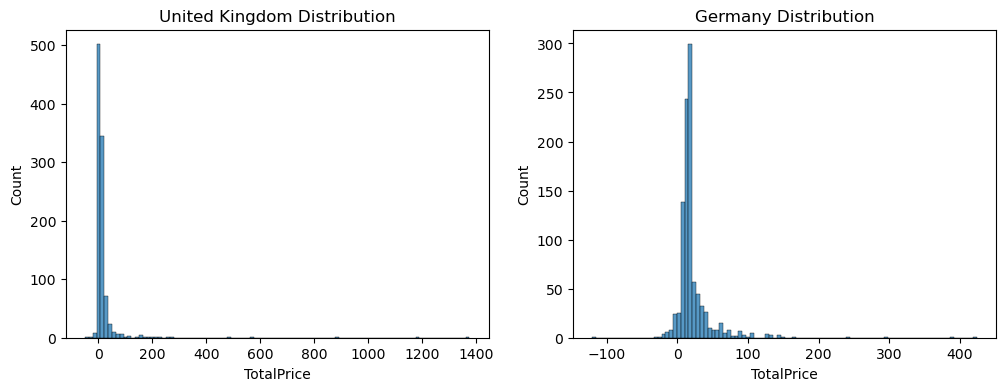

In [107]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(uk_s, bins=100, ax=ax[0])
ax[0].set_title('United Kingdom Distribution')
sns.histplot(g_s, bins=100, ax=ax[1])
ax[1].set_title('Germany Distribution')
plt.show()

- 두 국가 모두 이상치로 인해 대부분의 분포가 왼쪽에 몰려있다.

In [108]:
t, p = stats.ttest_ind(uk_s, g_s, equal_var=False)
print('t-통계량: ', t)
print('p-값', p)

t-통계량:  -1.166412637182753
p-값 0.243656546209105


- 표본의 분산이 큰 차이가 나 웰치검정으로 시행했을 때의 결과

In [109]:
t, p = stats.ttest_ind(uk_s, g_s, equal_var=True)
print('t-통계량: ', t)
print('p-값', p)

t-통계량:  -1.166412637182753
p-값 0.24358685602221325


- 표준검정 시행했을 때의 결과

- t-통계량의 경우 약 -1.16으로 절댓값이 1.96보다 작으므로 유의미한 차이가 있다고 보기 어려움
- p-값을 통해서도 약 0.24로 유의수준 0.05를 기준으로 하면 0.24 > 0.05로 귀무가설 기각을 보류해야 할 것으로 보임
- 즉, 두 집단의 평균 간 유의미한 차이가 없는 것으로 나왔음
- 모집단의 평균 차이는 약 6으로, 유의미한 차이가 있다는 것으로 생각해볼 경우 t-검정을 통한 결과는 '실제로 차이가 있지만 없다고 판단한 것'이게 됨.
- 따라서 '귀무가설을 기각해야 했으나 귀무가설 기각을 하지 않는 판단을 내린 제 2종 오류'의 가능성이 존재함
- 1종오류는 '귀무가설이 옳았으나 유의미한 차이가 있다고 판단해 귀무가설을 기각하는 오류'를 말하며 위 결과만을 봤을 땐 해당되지 않음

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [110]:
df.loc[df['is_weekday'] == 1, 'UnitPrice'].describe()

count    474958.000000
mean          4.066862
std          21.482542
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max        1917.000000
Name: UnitPrice, dtype: float64

- 주중 UnitPrice의 정보

In [111]:
df.loc[df['is_weekday'] == 0, 'UnitPrice'].describe()

count    64370.000000
mean         2.888049
std          7.959766
min          0.001000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64

- 주말 UnitPrice의 정보

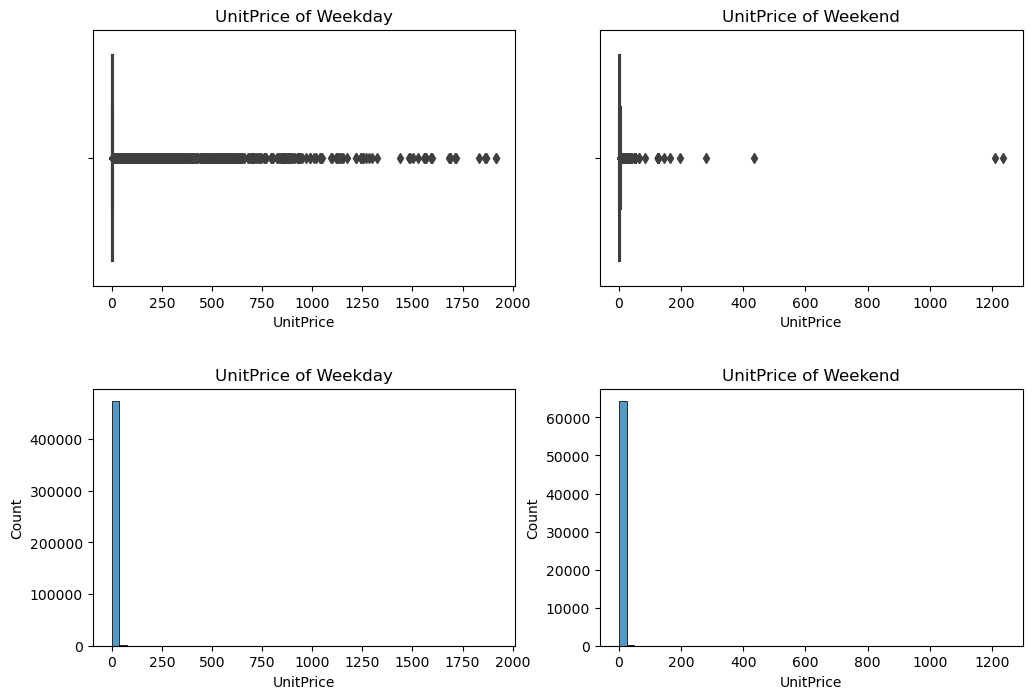

In [112]:
f, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(df.loc[df['is_weekday'] == 1, 'UnitPrice'], ax=ax[0, 0])
ax[0,0].set_title('UnitPrice of Weekday')
sns.boxplot(df.loc[df['is_weekday'] == 0, 'UnitPrice'], ax=ax[0, 1])
ax[0,1].set_title('UnitPrice of Weekend')
sns.histplot(df.loc[df['is_weekday'] == 1, 'UnitPrice'], ax=ax[1, 0], bins=50)
ax[1,0].set_title('UnitPrice of Weekday')
sns.histplot(df.loc[df['is_weekday'] == 0, 'UnitPrice'], ax=ax[1, 1], bins=50)
ax[1,1].set_title('UnitPrice of Weekend')
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

- 원본 데이터의 분포
- 이상치로 인해 왼쪽으로 분포가 치우친 모습
- 원활한 시각화를 위해 로그 스케일로 변환해서 시각화

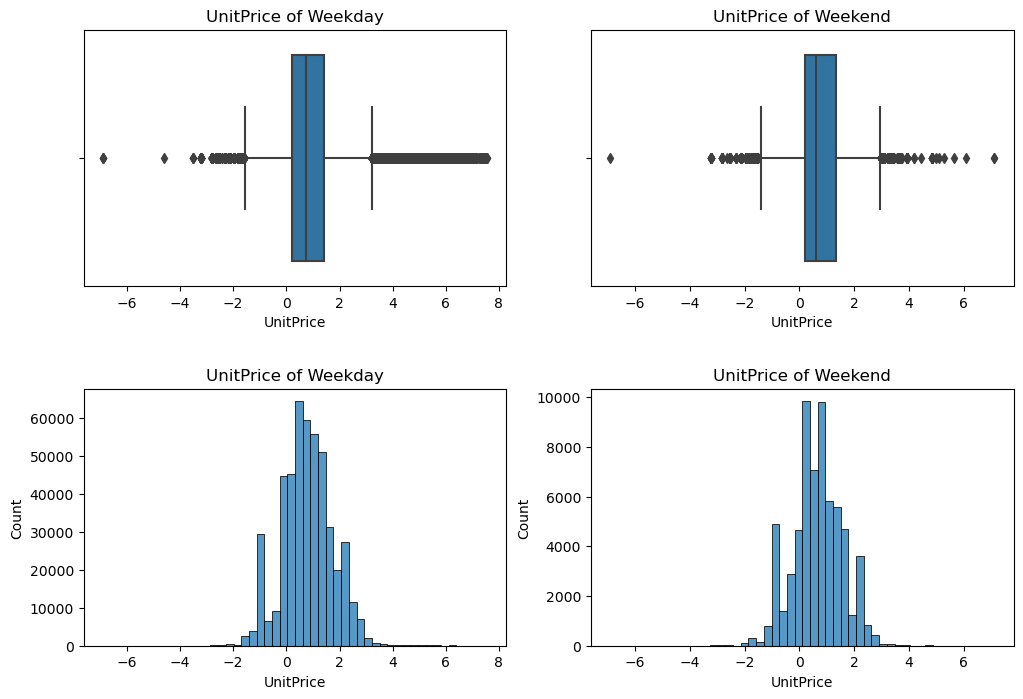

In [113]:
f, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(np.log(df.loc[df['is_weekday'] == 1, 'UnitPrice']), ax=ax[0, 0])
ax[0,0].set_title('UnitPrice of Weekday')
sns.boxplot(np.log(df.loc[df['is_weekday'] == 0, 'UnitPrice']), ax=ax[0, 1])
ax[0,1].set_title('UnitPrice of Weekend')
sns.histplot(np.log(df.loc[df['is_weekday'] == 1, 'UnitPrice']), ax=ax[1, 0], bins=50)
ax[1,0].set_title('UnitPrice of Weekday')
sns.histplot(np.log(df.loc[df['is_weekday'] == 0, 'UnitPrice']), ax=ax[1, 1], bins=50)
ax[1,1].set_title('UnitPrice of Weekend')
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

- 차이가 큰 값들로 인해 원본 데이터로 그래프를 그리면 분포 확인에 제한이 생겨 로그 스케일로 변환하여 시각화해 분포 확인
- 로그 스케일로 변환하여대체로 정규분포와 비슷한 분포를 보임
- 분위수를 보면 주중의 UnitPrice가 대체로 주말의 UnitPrice보다 근소하게 높음
- 주중의 평균 UnitPrice는 최댓값의 영향으로 주말의 UnitPrice보다 높은 것으로 보임
- 주중의 UnitPrice 편차가 주말보다 더 큰 모습을 보임
- 그러나 눈에 띌만한 큰 차이는 식별되지 않음

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

- 앞에서 DayOfWeek의 정보를 is_weekday에서 사용하였으므로, 분석 시 DayOfWeek 대신 is_weekday 사용

In [114]:
df_lr = df.drop(['InvoiceNo', 'Description', 'CustomerID', 'StockCode', 'TotalPrice'], axis=1)

In [115]:
df_lr.head()

,Quantity,UnitPrice,Country,is_weekday,InvoiceMonth
0,6,2.55,United Kingdom,1,12
1,6,3.39,United Kingdom,1,12
2,8,2.75,United Kingdom,1,12
3,6,3.39,United Kingdom,1,12
4,6,3.39,United Kingdom,1,12


In [116]:
df_lr.isna().sum()

Quantity        0
UnitPrice       0
Country         0
is_weekday      0
InvoiceMonth    0
dtype: int64

- 결측치 없음

In [117]:
df_lr.describe()

,Quantity,UnitPrice,is_weekday,InvoiceMonth
count,539328.000000,539328.000000,539328.000000,539328.000000
mean,9.847115,3.926168,0.880648,7.555766
std,215.425404,20.350094,0.324203,3.508867
min,-80995.000000,0.001000,0.000000,1.000000
25%,1.000000,1.250000,1.000000,5.000000
50%,3.000000,2.080000,1.000000,8.000000
75%,10.000000,4.130000,1.000000,11.000000
max,80995.000000,1917.000000,1.000000,12.000000


In [118]:
df_lr.corr()

,Quantity,UnitPrice,is_weekday,InvoiceMonth
Quantity,1.000000,-0.004585,0.004410,-0.001395
UnitPrice,-0.004585,1.000000,0.018780,-0.004867
is_weekday,0.004410,0.018780,1.000000,-0.032542
InvoiceMonth,-0.001395,-0.004867,-0.032542,1.000000


- 상관계수 확인해보니 대부분 0에 가까우며 독립변수들이 서로 독립적인 것으로 보임
- 그러나, 변수 간 선형이 아닌 비선형 관계를 가지고 있을 가능성도 있음

In [119]:
df[df['Quantity'] > 100]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,is_weekday,InvoiceMonth
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,0.42,14688,United Kingdom,50.40,1,12
178,536387,79321,CHILLI LIGHTS,192,3.82,16029,United Kingdom,733.44,1,12
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,3.37,16029,United Kingdom,647.04,1,12
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,3.37,16029,United Kingdom,647.04,1,12
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,1.45,16029,United Kingdom,626.40,1,12
...,...,...,...,...,...,...,...,...,...,...
537861,581487,21137,BLACK RECORD COVER FRAME,120,3.39,15694,United Kingdom,406.80,1,12
538705,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,2.46,NaN,United Kingdom,270.60,1,12
538964,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,0.19,12985,United Kingdom,34.20,1,12
539121,581566,23404,HOME SWEET HOME BLACKBOARD,144,3.26,18102,United Kingdom,469.44,1,12


In [120]:
df_lr = df_lr[df_lr['Quantity'] > 0]
df_lr = df_lr[df_lr['Quantity'] < 100]

- 판매수량을 예측해야하므로, 여기서는 비정상적으로 수량이 크거나 반품 데이터는 제거
- 여기서는 100을 기준으로 잡았으며, 데이터 50만개 중 5천개는 제거해도 무방할 것으로 판단됨

In [121]:
df_lr.reset_index(drop=True, inplace=True)

- 데이터 삭제 후 인덱스 정렬

In [122]:
df_lr['Country'].value_counts()

United Kingdom          480199
Germany                   8968
France                    8340
EIRE                      7646
Spain                     2459
Belgium                   2021
Switzerland               1942
Netherlands               1572
Portugal                  1496
Norway                    1055
Australia                  882
Italy                      755
Channel Islands            743
Finland                    674
Cyprus                     611
Unspecified                446
Austria                    394
Denmark                    371
Sweden                     342
Poland                     330
Israel                     293
Hong Kong                  280
Japan                      279
Singapore                  214
Iceland                    181
USA                        179
Canada                     149
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [123]:
df_lr['Country'].replace(['Hong Kong', 'Japan', 'Singapore', 'Saudi Arabia', 'Bahrain', 'Lebanon', 'United Arab Emirates', 'Israel'], 'Asia', inplace=True)
df_lr['Country'].replace(['USA', 'Brazil', 'Canada'], 'America', inplace=True)
df_lr['Country'].replace(['Poland', 'Austria', 'Lithuania', 'Czech Republic'], 'East Europe', inplace=True)
df_lr['Country'].replace(['Unspecified', 'European Community', 'RSA'], 'Others', inplace=True)

- 대륙으로 묶을 수 있는 정보 묶고, 데이터가 100개보다 적은 국가와 국가명이 없는 경우 하나로 통합

In [124]:
df_lr['Country'].value_counts()

United Kingdom     480199
Germany              8968
France               8340
EIRE                 7646
Spain                2459
Belgium              2021
Switzerland          1942
Netherlands          1572
Portugal             1496
Asia                 1206
Norway               1055
Australia             882
East Europe           784
Italy                 755
Channel Islands       743
Finland               674
Cyprus                611
Others                563
Denmark               371
America               360
Sweden                342
Iceland               181
Greece                145
Malta                 112
Name: Country, dtype: int64

In [125]:
df_lr['InvoiceMonth'] = df_lr['InvoiceMonth'].astype(str)

- encoding 위해 str로 변환

In [126]:
import statsmodels.api as sm

In [127]:
X = df_lr[['UnitPrice', 'Country', 'is_weekday', 'InvoiceMonth']]
X = sm.add_constant(X)
y = df_lr['Quantity']

In [128]:
X = pd.get_dummies(X, drop_first=True)

- 범주형 변수 변환 위해 더미변수 사용

In [129]:
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     872.1
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:57:36   Log-Likelihood:            -1.9992e+06
No. Observations:              523427   AIC:                         3.998e+06
Df Residuals:                  523390   BIC:                         3.999e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- EIRE, East Europe, Finland, France, Germany, Iceland, Switzerland, 12월 구매 의 p값을 보니 해당 정보들은 종속변수에 미치는 영향이 유의미하지 않은 것으로 보임
- 회귀계수를 살펴보니 Sweden, Netherlands, Australia, Asia, Others 의 변화는 다른 변수들에 비해 종속 변수에 큰 변화를 주는 것으로 보임
- 상수항 값은 11로 이 역시 다른 변수들에 비해 높음
- UnitPrice, is_weekday는 p값이 작아 유의미한 영향을 미칠 수 있는 정보지만 다른 정보들에 비해 계수는 상대적으로 작음, UnitPrice는 값의 범위가 큰 것이 원인으로 보임
- 결정계수는 0.05로 종속 변수의 변동성을 잘 설명하지 못하는 것으로 보임
- 이는 feature engineering을 잘못 했을 수도 있고, 데이터가 이상치나 정보력 부족 등으로 인해 종속변수를 충분히 설명하지 못해서 그런 것으로 보임
- 개인적인 생각으로 위 정보만으로 단순히 해당 물품을 몇개 구매했는지 알기란 어려울 것 같음

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [130]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
UnitPrice            0
CustomerID      132560
Country              0
TotalPrice           0
is_weekday           0
InvoiceMonth         0
dtype: int64

- CustomerID에 결측치 존재

In [131]:
refund = df.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID'], axis=1)

- 식별 용도로 예측에는 필요 없는 컬럼, 데이터 유형이 다양해 사용할 수 없는 컬럼 제거

In [132]:
refund['IsReturn'] = 0
refund.loc[refund['Quantity']<0, 'IsReturn'] = 1
refund.drop(['Quantity', 'TotalPrice'], axis=1, inplace=True)

- IsReturn 생성
- Quantity로 IsReturn 컬럼 생성했고, TotalPrice도 Quantity와 관련있으므로 제거  ( 타겟에 대한 너무 많은 정보를 포함함 )

In [133]:
refund.head()

,UnitPrice,Country,is_weekday,InvoiceMonth,IsReturn
0,2.55,United Kingdom,1,12,0
1,3.39,United Kingdom,1,12,0
2,2.75,United Kingdom,1,12,0
3,3.39,United Kingdom,1,12,0
4,3.39,United Kingdom,1,12,0


In [134]:
refund['Country'].replace(['Hong Kong', 'Japan', 'Singapore', 'Saudi Arabia', 'Bahrain', 'Lebanon', 'United Arab Emirates', 'Israel'], 'Asia', inplace=True)
refund['Country'].replace(['USA', 'Brazil', 'Canada'], 'America', inplace=True)
refund['Country'].replace(['Poland', 'Austria', 'Lithuania', 'Czech Republic'], 'East Europe', inplace=True)
refund['Country'].replace(['Unspecified', 'European Community', 'RSA'], 'Others', inplace=True)

- 대륙으로 묶을 수 있는 정보 묶고, 데이터가 100개보다 적은 국가와 국가명이 없는 경우 하나로 통합

In [135]:
refund['Country'].value_counts()

United Kingdom     492930
Germany              9493
France               8553
EIRE                 8192
Spain                2532
Netherlands          2367
Belgium              2069
Switzerland          2001
Portugal             1519
Asia                 1302
Australia            1256
Norway               1085
East Europe           807
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Others                564
America               474
Sweden                462
Denmark               389
Iceland               182
Greece                146
Malta                 127
Name: Country, dtype: int64

In [136]:
refund['InvoiceMonth'] = refund['InvoiceMonth'].astype(str)

- 범주형 변수로 취급

In [137]:
refund['IsReturn'].value_counts()

0    530083
1      9245
Name: IsReturn, dtype: int64

- IsReturn의 경우 0인 데이터가 1인 데이터 비해 50배 많음
- 데이터 불균형으로 인한 문제 발생 가능

In [138]:
major = refund[refund['IsReturn']==0]
minor = refund[refund['IsReturn']==1]
major_down = major.sample(n=40000, random_state=11)
refund = pd.concat([major_down, minor])

- 일반적으로 5배 이상 차이가 날 경우 불균형으로 판단하므로, 반품 데이터 4배 차이로 줄이기 위해 랜덤추출

In [139]:
refund = refund.reset_index(drop=True)

- 인덱스 초기화

In [140]:
refund_encoding = pd.get_dummies(refund, drop_first=True)

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [142]:
X = refund_encoding.drop('IsReturn', axis=1)
y = refund_encoding['IsReturn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

- 학습, 테스트 데이터 분할 시 불균형 피하기 위해 stratify 매개변수 사용

In [143]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

- 데이터 불균형 문제 해소를 위해 소수 클래스의 오분류에 더 큰 패널티를 주도록 class_weight 매개변수 사용 

In [144]:
pred = model.predict(X_test)

In [145]:
accuracy_score(y_test, pred)

0.5837140826479845

In [146]:
# 혼동 행렬
# 실제 값과 예측 값의 교차표
conf_matrix = confusion_matrix(y_test, pred)
print("혼동 행렬:\n", conf_matrix)

# 정밀도
# 모델이 긍정으로 예측한 것 중 실제 긍정 비율
precision = precision_score(y_test, pred)
print("\n정밀도:", precision)

# 재현율
# 실제 긍정인 것 중 모델이 긍정으로 예측한 비율
recall = recall_score(y_test, pred)
print("재현율:", recall)

# F1-Score
# 정밀도와 재현율의 조화 평균
f1 = f1_score(y_test, pred)
print("F1-Score:", f1)

# 정확도 
accuracy = accuracy_score(y_test, pred)
print("정확도:", accuracy)

혼동 행렬:
 [[4711 3289]
 [ 811 1038]]

정밀도: 0.23988906863877976
재현율: 0.5613845321795565
F1-Score: 0.33613989637305697
정확도: 0.5837140826479845


- 데이터의 불균형을 해소하기위해 데이터 수 줄이기, class_weight 매개변수 등을 사용해 정확도가 100%가 나오는 문제는 해결하였음
- 실제 반품된 데이터들 중 모델이 반품된 상품이라고 올바르게 예측한 비율인 재현율은 위 조치를 통해 기존보다 높일 수 있었음
- 그러나 모델이 반품된 데이터라고 예측한 데이터 중 실제로 반품된 데이터의 비율인 정밀도는 여전히 낮은 수준임을 볼 수 있음

##### 시도 1: 임계값 수정

In [147]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [148]:
prob = model.predict_proba(X_test)

In [149]:
threshold = 0.6
pred = (prob[:, 1] > threshold).astype(int)

In [150]:
# 혼동 행렬
# 실제 값과 예측 값의 교차표
conf_matrix = confusion_matrix(y_test, pred)
print("혼동 행렬:\n", conf_matrix)

# 정밀도
# 모델이 긍정으로 예측한 것 중 실제 긍정 비율
precision = precision_score(y_test, pred)
print("\n정밀도:", precision)

# 재현율
# 실제 긍정인 것 중 모델이 긍정으로 예측한 비율
recall = recall_score(y_test, pred)
print("재현율:", recall)

# F1-Score
# 정밀도와 재현율의 조화 평균
f1 = f1_score(y_test, pred)
print("F1-Score:", f1)

# 정확도 
accuracy = accuracy_score(y_test, pred)
print("정확도:", accuracy)

혼동 행렬:
 [[7610  390]
 [1552  297]]

정밀도: 0.43231441048034935
재현율: 0.16062736614386156
F1-Score: 0.23422712933753945
정확도: 0.8028226215859479


- 정밀도와 정확도는 올라갔으나 재현율과 f1-score는 감소하게 된다.

##### 시도 2: 모델 파라미터 수정

- 데이터 수가 많은 편이므로 solver파라미터를 saga로 변경해보기

In [151]:
model = LogisticRegression(class_weight='balanced', solver='saga')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='saga')

In [152]:
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 혼동 행렬
# 실제 값과 예측 값의 교차표
conf_matrix = confusion_matrix(y_test, pred)
print("혼동 행렬:\n", conf_matrix)

# 정밀도
# 모델이 긍정으로 예측한 것 중 실제 긍정 비율
precision = precision_score(y_test, pred)
print("\n정밀도:", precision)

# 재현율
# 실제 긍정인 것 중 모델이 긍정으로 예측한 비율
recall = recall_score(y_test, pred)
print("재현율:", recall)

# F1-Score
# 정밀도와 재현율의 조화 평균
f1 = f1_score(y_test, pred)
print("F1-Score:", f1)

# 정확도 
accuracy = accuracy_score(y_test, pred)
print("정확도:", accuracy)

혼동 행렬:
 [[5539 2461]
 [ 968  881]]

정밀도: 0.26361460203470977
재현율: 0.476473769605192
F1-Score: 0.3394336351377384
정확도: 0.6518428266829119


- f1-score는 비슷하나 재현율이 살짝 낮아졌고 정확도는 증가함

##### 시도 3: 예측 모델 변경

- 데이터들의 관계가 선형이 아닐수도 있으므로 비선형 관계도 반영할 수 있는 RandomForestClassifier 모델 사용

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.674078586658544

In [155]:
# 혼동 행렬
# 실제 값과 예측 값의 교차표
conf_matrix = confusion_matrix(y_test, pred)
print("혼동 행렬:\n", conf_matrix)

# 정밀도
# 모델이 긍정으로 예측한 것 중 실제 긍정 비율
precision = precision_score(y_test, pred)
print("\n정밀도:", precision)

# 재현율
# 실제 긍정인 것 중 모델이 긍정으로 예측한 비율
recall = recall_score(y_test, pred)
print("재현율:", recall)

# F1-Score
# 정밀도와 재현율의 조화 평균
f1 = f1_score(y_test, pred)
print("F1-Score:", f1)

# 정확도 
accuracy = accuracy_score(y_test, pred)
print("정확도:", accuracy)

혼동 행렬:
 [[5437 2563]
 [ 647 1202]]

정밀도: 0.31925630810092964
재현율: 0.6500811249323959
F1-Score: 0.4282151763448522
정확도: 0.674078586658544


- 초기 조건에 비해 정밀도, 재현율, f1-score, 정확도 모두 증가한 것으로 보아 변수들 사이에 비선형 관계가 존재할 것으로 보임